## BC1 - Hotel Customer Segmentation

### Dataset description

#### customer data:
- **ID** - Customer ID;
- **Nationality** - Nationality of the customer in ISO 3166-1 (Alpha 3) format;
- **Age** - Age of the customer;
- **DaysSinceCreation** - Number of elapsed days since the customer was created;
- **NameHash** - Hash of the customer name;
- **DocIDHash** - Hash of the customer personal document identification number (usually passport or ID card);

#### info related with the stay:
- **AverageLeadTime** - Average number of days before arrival date the customer makes booking;
- **LodgingRevenue** - Total amount of lodging revenue paid by the customer so far;
- **OtherRevenue** - Total amount of other revenue (e.g., food & beverage, spa, etc.) paid by the customer so far;
- **BookingsCanceled** - Number of bookings the customer made but subsequently canceled;
- **BookingsNoShowed** - Number of bookings the customer made but subsequently made a "no-show";
- **BookingsCheckedin** - Number of bookings the customer made, which actually ended up staying;
- **PersonNights** - Total person/nights the customer has stayed at the hotel so far; 
- **Persons/Nights** - the sum of Adultsand Childrenin each booking, multiplied by the number of Nights(Length-of-stay) of the booking;
- **RoomNights** - Total of room/nights the customer has stayed at the hotel so far. Room/Nights are the multiplication of the number of rooms of each booking by the the number of Nights(Length-of-stay) of the booking;
- **DistributionChannel** - Distribution channel normally used by the customer to make bookings at the hotel;
- **MarketSegment** - Current market segment of the customer; 
- **SRHighFloor** - Indication if the customer usually asks for a room in a higher floor (0: No, 1: Yes);
- **SRLowFloor** - Indication if the customer usually asks for a room in a lower floor (0: No, 1: Yes);
- **SRAccessibleRoom** - Indication if the customer usually asks for an accessible room (0: No, 1: Yes); 
- **SRMediumFloor** - Indication if the customer usually asks for a room in a middle floor (0: No, 1: Yes); 
- **SRBathtubIndication** - if the customer usually asks for a room with a bathtub (0: No, 1: Yes); 
- **SRShower** - Indication if the customer usually asks for a room with a shower (0: No, 1: Yes);
- **SRCrib** - Indication if the customer usually asks for a crib (0: No, 1: Yes);
- **SRKingSizeBed** - Indication if the customer usually asks for a room with a king size bed (0: No, 1: Yes); 
- **SRTwinBed** - Indication if the customer usually asks for a room with a twin bed (0: No, 1: Yes); 
- **SRNearElevator** - Indication if the customer usually asks for a room near the elevator (0: No, 1: Yes); 
- **SRAwayFromElevator** - Indication if the customer usually asks for a room away from the elevator (0: No, 1: Yes);
- **SRNoAlcoholInMiniBar** - Indication if the customer usually asks for a room with no alcohol in the mini bar (0: No, 1: Yes);
- **SRQuietRoom** - Indication if the customer usually asks for a room away from the noise (0: No, 1: Yes).

<h3>Set up

In [126]:
import os
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
import collections
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

<h3>Data Understanding

In [127]:
#import and get info
df = pd.read_csv('Dataset.csv', sep=";")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111733 entries, 0 to 111732
Data columns (total 29 columns):
ID                      111733 non-null int64
Nationality             111733 non-null object
Age                     107561 non-null float64
DaysSinceCreation       111733 non-null int64
NameHash                111733 non-null object
DocIDHash               110732 non-null object
AverageLeadTime         111733 non-null int64
LodgingRevenue          111733 non-null float64
OtherRevenue            111733 non-null float64
BookingsCanceled        111733 non-null int64
BookingsNoShowed        111733 non-null int64
BookingsCheckedIn       111733 non-null int64
PersonsNights           111733 non-null int64
RoomNights              111733 non-null int64
DistributionChannel     111733 non-null object
MarketSegment           111733 non-null object
SRHighFloor             111733 non-null int64
SRLowFloor              111733 non-null int64
SRAccessibleRoom        111733 non-null int64
SRMe

In [128]:
#see dataset
df.head(10)

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,1,PRT,52.0,440,0x2C371FD6CE12936774A139FD7430C624F1C4D5109CE6...,0x434FD3D59469C73AFEA087017FAF8CA2296493AEABDE...,59,292.0,82.3,1,...,0,0,0,0,0,0,0,0,0,0
1,2,PRT,NaN,1385,0x198CDB98BF37B6E23F9548C56A88B00912D65A9AA0D6...,0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...,61,280.0,53.0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,DEU,32.0,1385,0xDA46E62F66936284DF2844EC4FC542D0DAD780C0EE0C...,0x27F5DF762CCDA622C752CCDA45794923BED9F1B66300...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,FRA,61.0,1385,0xC45D4CD22C58FDC5FD0F95315F6EFA5A6E7149187D49...,0x8E59572913BB9B1E6CAA12FA2C8B7BF387B1D1F3432E...,93,240.0,60.0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,FRA,52.0,1385,0xD2E3D5BFCA141865669F98D64CDA85AD04DEFF47F8A0...,0x42BDEE0E05A9441C94147076EDDCC47E604DA5447DD4...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
5,6,JPN,55.0,1385,0xA3CF1A4692BE0A17CFD3BFD9C07653556BDADF5F4BE7...,0x506065FBCE220DCEA4465C7310A84F04165BCB5906DC...,58,230.0,24.0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,JPN,50.0,1385,0x94DB830C90A6DA2331968CFC9448AB9A3CE07D7CFEDD...,0x47E5E4B21585F1FD956C768E730604241B380EDFEA68...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
7,8,FRA,33.0,1385,0x165B609162C92BF563E96DB03539363F07E784C219A8...,0x6BB66BA80C726B9967988A889D83699B609D11C65AD7...,38,535.0,94.0,0,...,0,0,0,0,1,0,0,0,0,0
8,9,FRA,43.0,1385,0x44BB41EF2D87698E75B6FBB77A8815BF48DAA912C140...,0x6C456E45A78A20BC794137AE326A81D587B6528B3944...,0,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,0
9,10,IRL,26.0,1385,0x9BEECEE0C18B0957C7424443643948E99A0EC8326EF9...,0x199C61A5442D08987001E170B74D244DF6AF1FC9AE92...,96,174.0,69.0,0,...,0,0,0,0,0,0,0,0,0,0


In [129]:
#get some insights about dataset
df.describe()

,ID,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
count,111733.000000,107561.000000,111733.000000,111733.000000,111733.000000,111733.000000,111733.000000,111733.000000,111733.000000,111733.000000,...,111733.000000,111733.000000,111733.000000,111733.000000,111733.000000,111733.000000,111733.000000,111733.000000,111733.000000,111733.000000
mean,55867.000000,45.639191,595.026599,60.833147,283.851283,64.682802,0.002282,0.000600,0.737607,4.328318,...,0.000770,0.003132,0.001629,0.016181,0.363268,0.156811,0.000331,0.003598,0.000197,0.087718
std,32254.683151,17.244952,374.657382,85.115320,379.131556,123.580715,0.080631,0.028217,0.730889,4.630739,...,0.027733,0.055881,0.040327,0.126173,0.480943,0.363624,0.018195,0.059874,0.014031,0.282886
min,1.000000,-10.000000,36.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27934.000000,33.000000,288.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,55867.000000,47.000000,522.000000,21.000000,208.000000,31.000000,0.000000,0.000000,1.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,83800.000000,58.000000,889.000000,95.000000,393.300000,84.000000,0.000000,0.000000,1.000000,6.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,111733.000000,123.000000,1385.000000,588.000000,21781.000000,8859.250000,15.000000,3.000000,76.000000,116.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


- Age - tem valores negativos; consideramos aqueles valores máximos?
- AverageLeadTime tem um máximo de 588... é outlier, mas devíamos apagar ou ver que são pessoas que reservam para ser mais barato?
- LodgingRevenue e OtherRevenue têm valores máximos muito fora do normal, deviamos considerar?
- BookingsCanceled - 15 de máximo? são clientes que não interessam, certo?
- BookingsCheckedIn e PersonsNights - o valor máximo mostra, provavelmente, o melhor cliente

In [130]:
#Check missing values
df.isnull().sum()

ID                         0
Nationality                0
Age                     4172
DaysSinceCreation          0
NameHash                   0
DocIDHash               1001
AverageLeadTime            0
LodgingRevenue             0
OtherRevenue               0
BookingsCanceled           0
BookingsNoShowed           0
BookingsCheckedIn          0
PersonsNights              0
RoomNights                 0
DistributionChannel        0
MarketSegment              0
SRHighFloor                0
SRLowFloor                 0
SRAccessibleRoom           0
SRMediumFloor              0
SRBathtub                  0
SRShower                   0
SRCrib                     0
SRKingSizeBed              0
SRTwinBed                  0
SRNearElevator             0
SRAwayFromElevator         0
SRNoAlcoholInMiniBar       0
SRQuietRoom                0
dtype: int64

With the information above, we can detect some inconsistencies:
<ul>
  <li>In the Age and AverageLeadTime columns there are negative values - it's not supposed to</li>
  <li>There is a person with 123 years old - impossible</li>
  <li>There are costumers which LodgingRevenue and OtherRevenue are zero</li>
  <li>There are 4172 Nan values in the Age column</li>
  <li>There are 1001 Nan values in the DocIDHash column (I think we can drop this column)</li>
</ul>

<h4><u>Continuous Variables

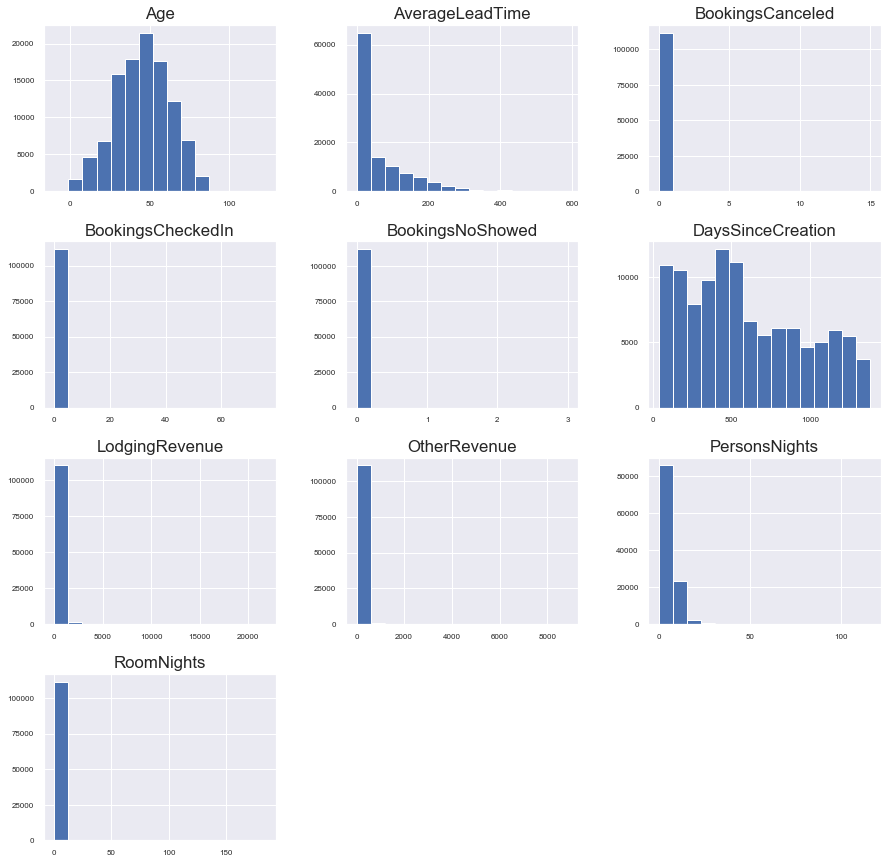

In [131]:
#plot histograms for continuos values
columns = ['Age', 'DaysSinceCreation', 'AverageLeadTime','LodgingRevenue', 'OtherRevenue', 'BookingsCanceled', 'BookingsNoShowed','BookingsCheckedIn','PersonsNights','RoomNights']
df_cont = df[columns]
df_cont.hist(bins=15, figsize=(15, 15), layout=(4, 3), xlabelsize=8, ylabelsize=8);

In [132]:
#Peso dos Nan values da Age no Total:
print(str(int((4172/111733)*100)) + str('%'))

3%


<u>Missing Values and Noises Treatment</u>


For <b>Age</b> column, as we can see above, age has a symmetric distribution, and by this reason we can fill the Nan Values with the Age average. For <b> DocIDHash</b> column once we are not going to use it, we can just drop it.

In [133]:
#Fill Nan values in the Age column
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [134]:
# We wont need the NameHash and DocumentIDHash, so let's drop it.
df = df.drop(['NameHash', 'DocIDHash'], axis=1)
print(df.isnull().sum())

ID                      0
Nationality             0
Age                     0
DaysSinceCreation       0
AverageLeadTime         0
LodgingRevenue          0
OtherRevenue            0
BookingsCanceled        0
BookingsNoShowed        0
BookingsCheckedIn       0
PersonsNights           0
RoomNights              0
DistributionChannel     0
MarketSegment           0
SRHighFloor             0
SRLowFloor              0
SRAccessibleRoom        0
SRMediumFloor           0
SRBathtub               0
SRShower                0
SRCrib                  0
SRKingSizeBed           0
SRTwinBed               0
SRNearElevator          0
SRAwayFromElevator      0
SRNoAlcoholInMiniBar    0
SRQuietRoom             0
dtype: int64


After this we are going to:
<ul>
    <li>Check how many negative values there are in 'Age' and 'AverageLeadTime' columns</li>
    <li>Check how many clients exist with age greater than 112 years old</li>
    <li>Drop the values below</li>
    <li>Check how many underage costumers (less then 18 years old) there are in our dataset</li>
     <li>Check how many underage costumers which LodgingRevenue and OtherRevenue are equal to zero</li>
</ul>

In [135]:
a = str(len(df[df.Age <= 0]))
b = str(len(df[df.Age >=112]))
c = str(len(df[df.AverageLeadTime < 0]))

print('There are {} costumers which Age is equal or less than zero.'.format(a))
print('')
print('There are {} costumers which Age is greater than 112 years old.'.format(b))
print('')
print('There are {} costumers which Average Lead Time is less than zero.'.format(c))

There are 32 costumers which Age is equal or less than zero.

There are 6 costumers which Age is greater than 112 years old.

There are 13 costumers which Average Lead Time is less than zero.


In [136]:
#Let's drop the this values
df_after = df[(df.Age > 0) & (df.Age <= 112)]
df_after = df_after[df_after.AverageLeadTime >= 0]
df_after

,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,1,PRT,52.000000,440,59,292.00,82.3,1,0,2,...,0,0,0,0,0,0,0,0,0,0
1,2,PRT,45.639191,1385,61,280.00,53.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3,DEU,32.000000,1385,0,0.00,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,FRA,61.000000,1385,93,240.00,60.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,FRA,52.000000,1385,0,0.00,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111728,111729,DEU,31.000000,36,0,0.00,0.0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
111729,111730,BRA,43.000000,36,170,755.25,20.0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
111730,111731,BRA,37.000000,36,0,0.00,0.0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
111731,111732,DEU,48.000000,36,66,708.00,185.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [137]:
#Check costumers with underage and no revenue
e = str(len(df_after[(df_after.LodgingRevenue <= 0)]))

print('There are {} which Lodging Revenues are equal to zero.'.format(e))

There are 33750 which Lodging Revenues are equal to zero.


I think it's better if we decide together what to do with these "inconsistencies".

<u>Outliers and Correlations</u>

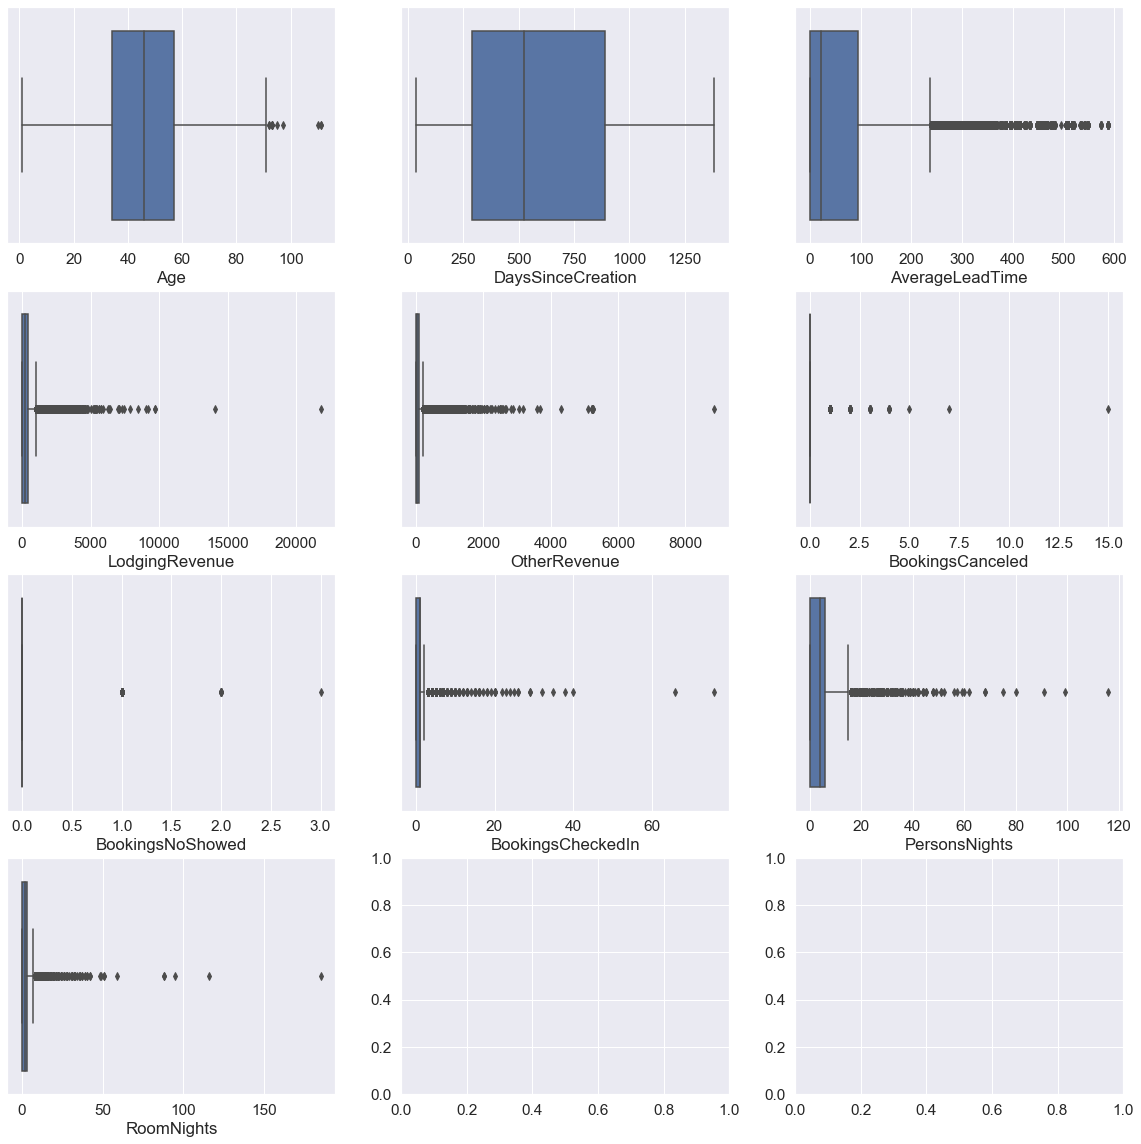

In [138]:
#Outliers detection
# Do boxplots on all numeric variables
fig, ax = plt.subplots(4, 3, figsize=(20, 20))
for var, subplot in zip(df_after[columns], ax.flatten()):
    sns.boxplot(df_after[var], ax=subplot)   

Outliers analysis:
<ul>
    <li><b>Age</b>: Consideramos apenas outliers, aliás, valores impossíveis, os valores negativos e a pessoa com 123 anos, pois após uma pesquisa vimos que a pessoa mais velha que já existiu tinha 122 anos.</li>
    <li><b>DaysSinceCreation</b>: No outlier detected.</li>
    <li><b>AverageLeadTime</b>:Consider as outliers after ~580 (?) (Filipa: pela distribuição da boxplot, parece que não há outliers, há é muitos clientes depois do 3.º quartil)</li>
    <li><b>Lodging Revenue</b>:Consider as outliers after 10 000 (?)</li>
    <li><b>Other Revenue</b>:Consider as outliers after 4000 (?) (Filipa: acho que talvez considerar só o ultimo outlier porque está mesmo muito longe)</li>
    <li><b>Bookings Canceled</b>:Consider as outliers after after 7.5 (?)</li>
    <li><b>Bookings No Showed</b>:No outlier detected (?)</li>
    <li><b>Bookings CheckedIn</b>:Consider as outliers after after 40 (?) (Filipa: também não sei, porque de certo modo são os melhores clientes)</li>
    <li><b>Persons Night</b>:Consider as outliers after ~65 (?) (Filipa: também não consigo ter certezas)</li>
    <li><b>Room Nights</b>:Consider as outliers after after ~55 (?)</li>
</ul>

In [139]:
df_after = df_after[(df_after.LodgingRevenue < 10000) & (df_after.OtherRevenue < 8000) & (df_after.BookingsCanceled < 8)
                    & (df_after.BookingsCheckedIn < 45) & (df_after.RoomNights < 70)]

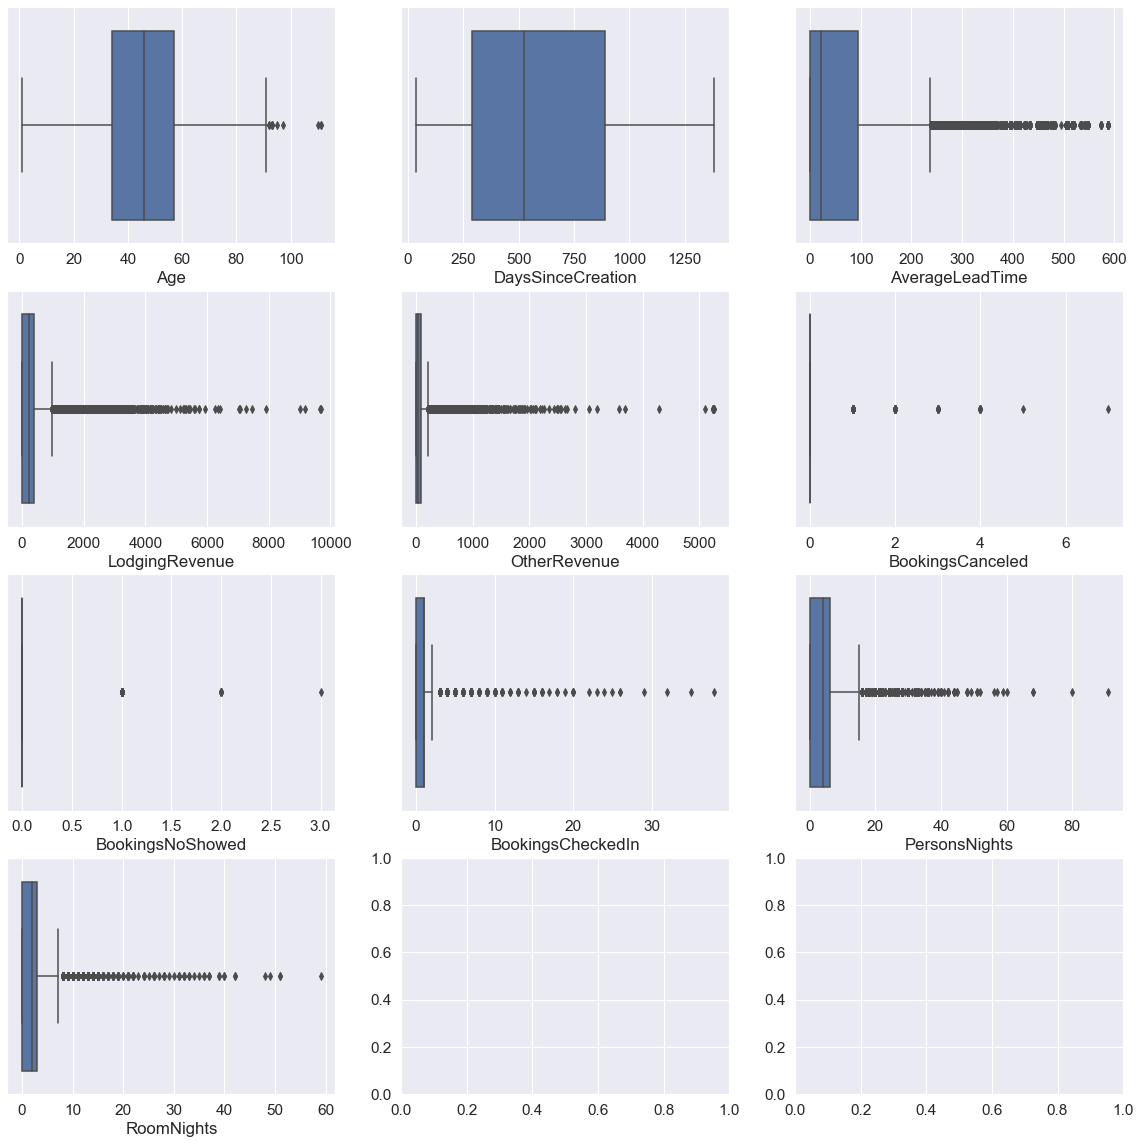

In [142]:
fig, ax = plt.subplots(4, 3, figsize=(20, 20))
for var, subplot in zip(df_after[columns], ax.flatten()):
    sns.boxplot(df_after[var], ax=subplot) 

In [145]:
f = str(len(df_after[(df_after.BookingsNoShowed > 0)]))
g = str(len(df_after[(df_after.BookingsCanceled > 0)]))
h = str(len(df_after[(df_after.Age > 100)]))
print('There are {} which BookingsNoShowed are superior to zero.'.format(f))
print('')
print('There are {} which BookingsCanceled are superior to zero.'.format(g))
print('')
print('There are {} which Age is more than 100.'.format(h))

There are 55 which BookingsNoShowed are superior to zero.

There are 163 which BookingsCanceled are superior to zero.

There are 3 which Age is more than 100.


- Deviamos retirar os que têm mais de 100 anos? (são só 3 pessoas)
- Será que os BookingsNoShowed e BookingsCanceled são assim tão importantes? São poucas pessoas.

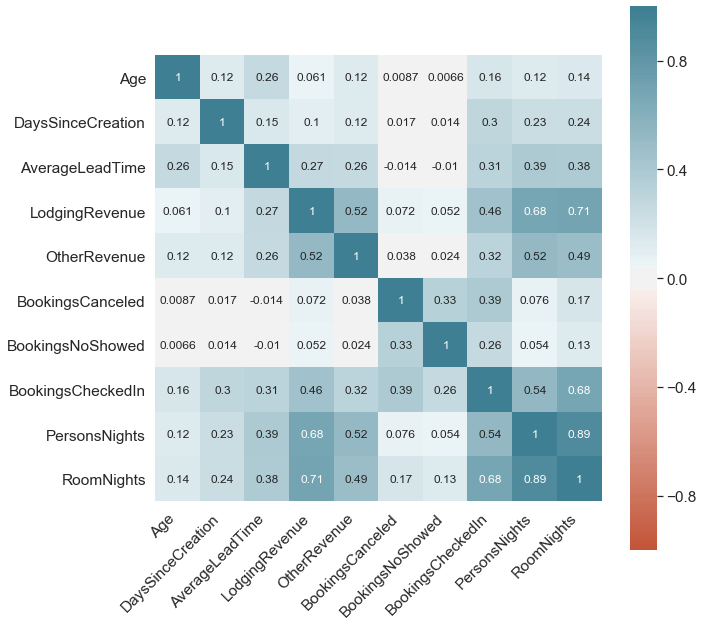

In [146]:
# Plot correlation heatmap of all numeric variables
corr = df_after[columns].corr()
plt.figure(figsize=(10, 10))
sns.set(font_scale=1.4)
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True, annot_kws={"size": 12}
)
bottom, top = ax.get_ylim() # These two lines were added due to bug on current Seaborn version
ax.set_ylim(bottom + 0.5, top - 0.5) #
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

Variables with high correlation:
<ul>
    <li>Lodging Revenue and Room Nights - we will drop Room Nights</li>
    <li>Lodging Revenue and Persons Nights</li>
    <li>Persons Nights and Room Nights</li>
    <li>BookingsCheckedIn and Room Nights</li>
</ul>

In [147]:
df_after = df_after.drop(['RoomNights'], axis=1)

<h4><u>Categorical Variables

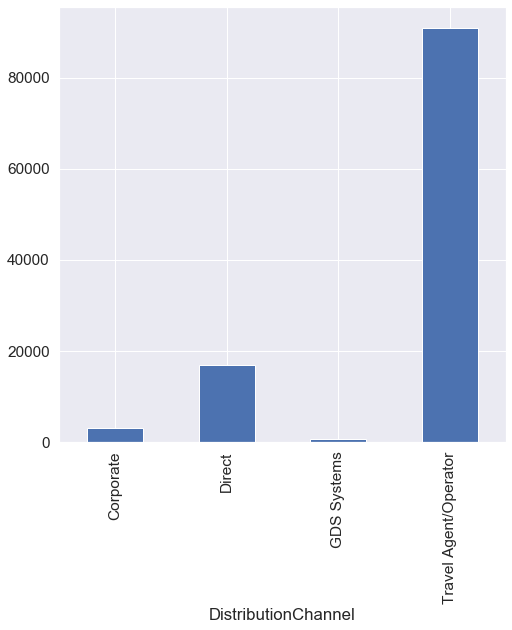

In [148]:
# Check counts of categorical variables
df_cat = df_after.loc[:,['ID','DistributionChannel','MarketSegment']]
channel =df_cat.groupby(['DistributionChannel'])['ID'].count()

channel.plot(kind="bar", 
                 figsize=(8,8))

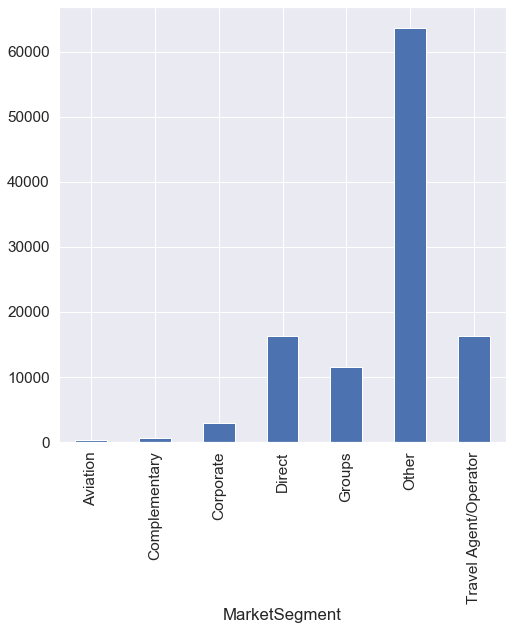

In [149]:
market =df_cat.groupby(['MarketSegment'])['ID'].count()

market.plot(kind="bar", 
                 figsize=(8,8))

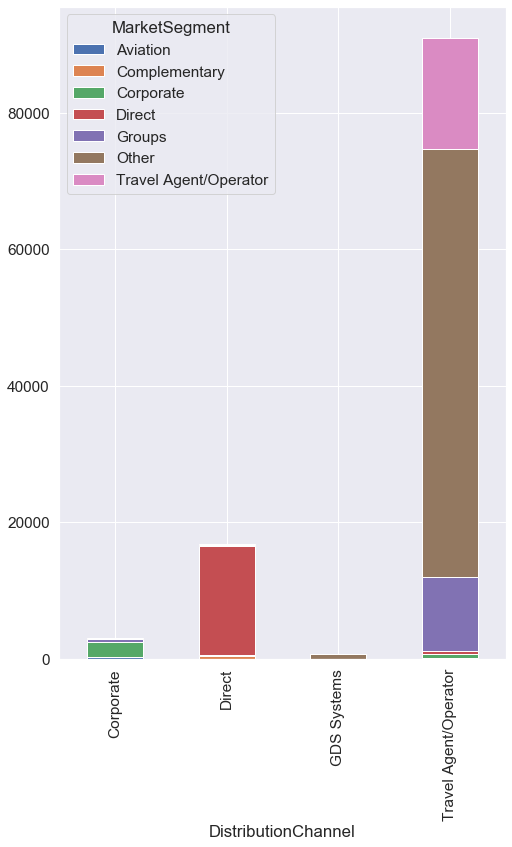

In [150]:
#channel_market =df_cat.groupby(['DistributionChannel'])['MarketSegment'].count()
channel_market =df_cat.pivot_table(values='ID', columns='MarketSegment', index='DistributionChannel', aggfunc='count')
channel_market = channel_market.fillna(0)
channel_market.plot(kind='bar',figsize=(8,12),stacked=True,legend=True)
#pd.pivot_table(g, values='X', rows='Y', cols='Z', margins=False, aggfunc='count')

We can observe that most of the costumers came from Travel Agents or Operatores channels, being the majority of them of the Travel Agent/Operator, Groups and Other Market Segments. 
**Note**: We have equal names in the Market Segments and Distribution Channel, such as Coporate, Travel Agent/Operator and Direct.

<u>Revenue per Distribution Channel

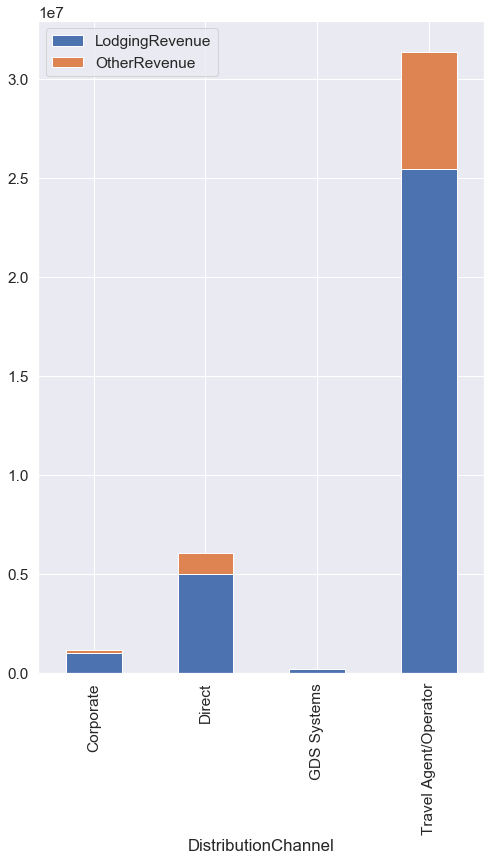

In [151]:
#Plot revenue per Distribution Channel
df_rev1 = df_after.pivot_table(values=['LodgingRevenue','OtherRevenue'], index='DistributionChannel', aggfunc='sum')
df_rev1.plot(kind='bar',figsize=(8,12),stacked=True,legend=True) 

<u>Revenue per Market Segment

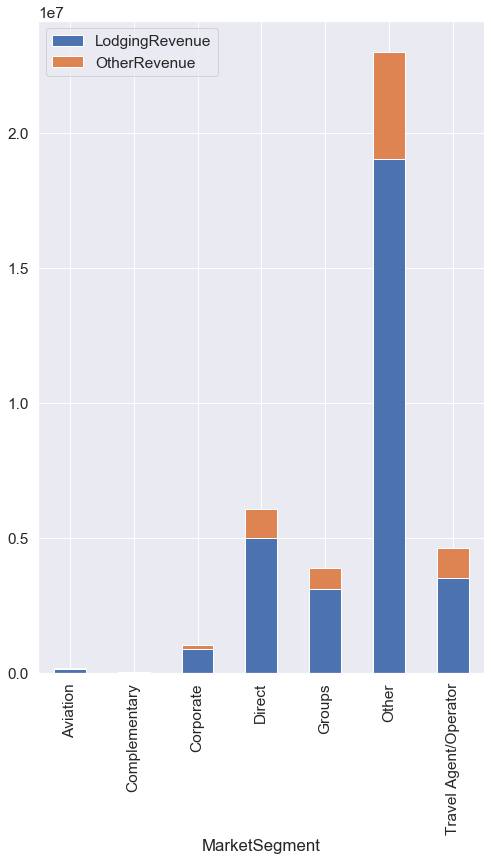

In [152]:
#Plot revenue per Market Segment
df_rev2 = df_after.pivot_table(values=['LodgingRevenue','OtherRevenue'], index='MarketSegment', aggfunc='sum')
df_rev2.plot(kind='bar',figsize=(8,12),stacked=True,legend=True) 

<u>Average Lead Time per Market Segment

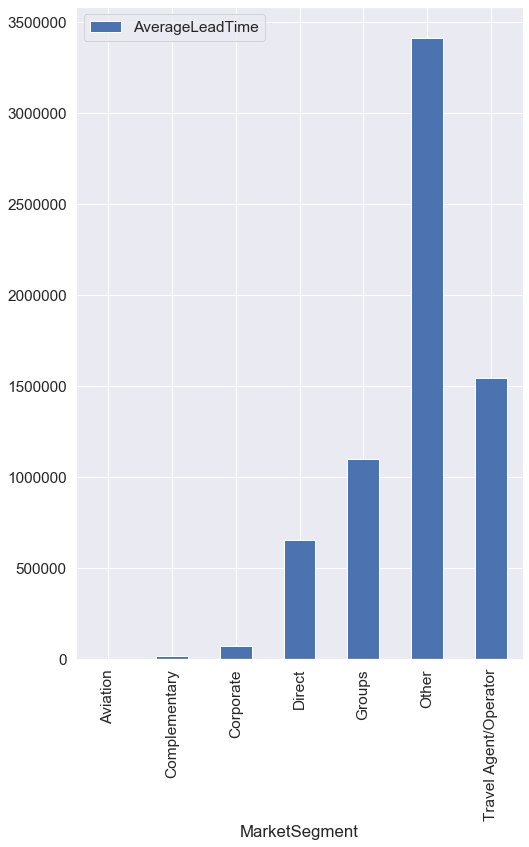

In [153]:
#Plot Average Lead Time per Market Segment
df_alt = df_after.pivot_table(values=['AverageLeadTime'], index='MarketSegment', aggfunc='sum')
df_alt.plot(kind='bar',figsize=(8,12),stacked=True,legend=True) 

<u>How many nationalities are?

In [154]:
#Check how many nationatilies we have in our dataset
n = len(df_after['Nationality'].drop_duplicates().to_list())
print('There are {} different nationalities.'.format(n))

There are 197 different nationalities.


<h4><u>Boolean Variables

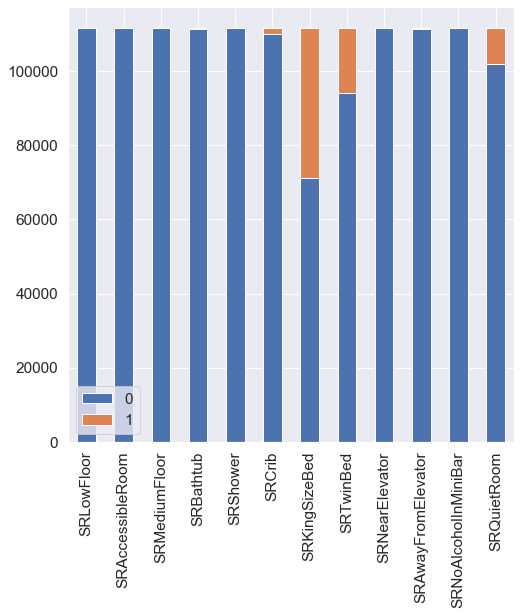

In [155]:
columns = df_after.columns.to_list()
boleans = df_after[columns[14:]]
#count per 0 and 1
boleans = boleans.apply(pd.Series.value_counts).transpose()

boleans.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True)

Do these variables all matter? Let's check. If we have two variables related to the Elevator and both show 0, this might mean that they did not answered or that it does not matter... so I believe we should not use either.

In [158]:
i = str(len(df_after[(df_after.SRLowFloor == 1)]))
j = str(len(df_after[(df_after.SRAccessibleRoom == 1)]))
k = str(len(df_after[(df_after.SRMediumFloor == 1)]))
l = str(len(df_after[(df_after.SRBathtub == 1)]))
m = str(len(df_after[(df_after.SRShower == 1)]))
n = str(len(df_after[(df_after.SRCrib == 1)]))
o = str(len(df_after[(df_after.SRKingSizeBed == 1)]))
p = str(len(df_after[(df_after.SRTwinBed == 1)]))
q = str(len(df_after[(df_after.SRNearElevator == 1)]))
r = str(len(df_after[(df_after.SRAwayFromElevator == 1)]))
s = str(len(df_after[(df_after.SRNoAlcoholInMiniBar == 1)]))
t = str(len(df_after[(df_after.SRQuietRoom == 1)]))

print('There are {} people that answer yes to SRLowFloor.'.format(i))
print('')
print('There are {} people that answer yes to SRAccessibleRoom.'.format(g))
print('')
print('There are {} people that answer yes to SRMediumFloor.'.format(h))
print('')
print('There are {} people that answer yes to SRBathtub.'.format(l))
print('')
print('There are {} people that answer yes to SRShower.'.format(m))
print('')
print('There are {} people that answer yes to SRCrib.'.format(n))
print('')
print('There are {} people that answer yes to SRKingSizeBed.'.format(o))
print('')
print('There are {} people that answer yes to SRTwinBed.'.format(p))
print('')
print('There are {} people that answer yes to SRNearElevator.'.format(q))
print('')
print('There are {} people that answer yes to SRAwayFromElevator.'.format(r))
print('')
print('There are {} people that answer yes to SRNoAlcoholInMiniBar.'.format(s))
print('')
print('There are {} people that answer yes to SRQuietRoom.'.format(t))

There are 146 people that answer yes to SRLowFloor.

There are 163 people that answer yes to SRAccessibleRoom.

There are 3 people that answer yes to SRMediumFloor.

There are 350 people that answer yes to SRBathtub.

There are 182 people that answer yes to SRShower.

There are 1796 people that answer yes to SRCrib.

There are 40568 people that answer yes to SRKingSizeBed.

There are 17518 people that answer yes to SRTwinBed.

There are 37 people that answer yes to SRNearElevator.

There are 402 people that answer yes to SRAwayFromElevator.

There are 22 people that answer yes to SRNoAlcoholInMiniBar.

There are 9800 people that answer yes to SRQuietRoom.


- With these results, I believe we should use the SRCrib, SRKingSizeBed, SRTwinBed and SRQuietRoom variables. 

In [159]:
df_after.columns

Index(['ID', 'Nationality', 'Age', 'DaysSinceCreation', 'AverageLeadTime',
       'LodgingRevenue', 'OtherRevenue', 'BookingsCanceled',
       'BookingsNoShowed', 'BookingsCheckedIn', 'PersonsNights',
       'DistributionChannel', 'MarketSegment', 'SRHighFloor', 'SRLowFloor',
       'SRAccessibleRoom', 'SRMediumFloor', 'SRBathtub', 'SRShower', 'SRCrib',
       'SRKingSizeBed', 'SRTwinBed', 'SRNearElevator', 'SRAwayFromElevator',
       'SRNoAlcoholInMiniBar', 'SRQuietRoom'],
      dtype='object')

In [163]:
data = pd.DataFrame([df_after.Nationality, df_after.Age, df_after.AverageLeadTime, df_after.LodgingRevenue,
                    df_after.OtherRevenue, df_after.BookingsNoShowed, df_after.BookingsCheckedIn, df_after.PersonsNights,
                    df_after.DistributionChannel, df_after.SRCrib, df_after.SRKingSizeBed, 
                    df_after.SRTwinBed, df_after.SRQuietRoom]).transpose()

In [164]:
data

,Nationality,Age,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsNoShowed,BookingsCheckedIn,PersonsNights,DistributionChannel,SRCrib,SRKingSizeBed,SRTwinBed,SRQuietRoom
0,PRT,52,59,292,82.3,0,2,6,Corporate,0,0,0,0
1,PRT,45.6392,61,280,53,0,1,10,Travel Agent/Operator,0,0,0,0
2,DEU,32,0,0,0,0,0,0,Travel Agent/Operator,0,0,0,0
3,FRA,61,93,240,60,0,1,10,Travel Agent/Operator,0,0,0,0
4,FRA,52,0,0,0,0,0,0,Travel Agent/Operator,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
111728,DEU,31,0,0,0,0,0,0,Travel Agent/Operator,0,1,0,0
111729,BRA,43,170,755.25,20,0,1,10,Travel Agent/Operator,0,1,0,0
111730,BRA,37,0,0,0,0,0,0,Travel Agent/Operator,0,1,0,0
111731,DEU,48,66,708,185,0,1,8,Travel Agent/Operator,0,0,0,0


In [166]:
df_after.Nationality.unique()

array(['PRT', 'DEU', 'FRA', 'JPN', 'IRL', 'ESP', 'BEL', 'NLD', 'AUT',
       'ITA', 'CHN', 'RUS', 'POL', 'USA', 'HUN', 'CRI', 'MEX', 'CHE',
       'ROU', 'GBR', 'BIH', 'BRA', 'FIN', 'AGO', 'CAN', 'ZAF', 'TWN',
       'GRC', 'AUS', 'ISR', 'BGR', 'SAU', 'SWE', 'ARG', 'ARM', 'CHL',
       'MAR', 'MOZ', 'KOR', 'TUN', 'DNK', 'NOR', 'MYS', 'EGY', 'IND',
       'HRV', 'CPV', 'JOR', 'COD', 'DZA', 'LUX', 'TUR', 'IRN', 'LBY',
       'PAN', 'COL', 'VEN', 'GNB', 'CZE', 'AND', 'SVN', 'PER', 'UGA',
       'AZE', 'NZL', 'LTU', 'SRB', 'EST', 'KAZ', 'KWT', 'IDN', 'UKR',
       'SVK', 'MLI', 'ARE', 'BGD', 'THA', 'TZA', 'LVA', 'PHL', 'BHR',
       'NAM', 'BOL', 'CYP', 'SGP', 'CMR', 'MLT', 'URY', 'PAK', 'JAM',
       'ECU', 'SYC', 'QAT', 'PRY', 'BRB', 'OMN', 'TMP', 'ABW', 'LBN',
       'AIA', 'SLV', 'DMA', 'CUB', 'VNM', 'GEO', 'IRQ', 'GAB', 'LIE',
       'SEN', 'BLR', 'ISL', 'DOM', 'GUY', 'LCA', 'ATA', 'NGA', 'RWA',
       'CIV', 'ALB', 'MKD', 'MNE', 'GTM', 'GHA', 'MDV', 'MCO', 'MUS',
       'SYR', 'TGO',

In [177]:
mapping = {'PRT':'Europe', 'DEU':'Europe', 'FRA':'Europe', 'IRL':'Europe', 'ESP':'Europe', 'BEL':'Europe', 
         'NLD':'Europe', 'AUT':'Europe', 'ITA':'Europe', 'RUS':'Europe', 'POL':'Europe', 'HUN':'Europe', 'CHE':'Europe', 
         'ROU':'Europe', 'GRB':'Europe', 'BIH':'Europe', 'FIN':'Europe', 'GRC':'Europe','BGR':'Europe',
         'SWE':'Europe', 'DNK':'Europe', 'NOR':'Europe', 'HRV':'Europe', 'LUX':'Europe', 'CZE':'Europe', 'AND':'Europe',
         'SVN':'Europe', 'LTU':'Europe', 'SRB':'Europe', 'EST':'Europe', 'UKR':'Europe', 'SVK':'Europe', 'LVA':'Europe',
         'CYP':'Europe', 'MLT':'Europe', 'LIE':'Europe', 'BLR':'Europe', 'ISL':'Europe', 'ALB':'Europe', 'MKD':'Europe',
         'MNE':'Europe', 'MCO':'Europe', 'FRO':'Europe', 'JEY':'Europe', 'GIB':'Europe', 'SMR':'Europe', 'SJM':'Europe',
         'JPN':'Asia', 'CHN':'Asia', 'TWN':'Asia', 'ISR':'Asia', 'SAU':'Asia', 'ARM':'Asia', 'KOR':'Asia', 'MYS':'Asia',
         'IND':'Asia', 'JOR':'Asia', 'IRN':'Asia', 'AZE':'Asia', 'KAZ':'Asia', 'KWT':'Asia', 'IDN':'Asia', 'BGD':'Asia',
         'THA':'Asia', 'PHL':'Asia', 'BHR':'Asia', 'SGP':'Asia', 'PAK':'Asia', 'QAT':'Asia', 'OMN':'Asia', 'LBN':'Asia',
         'VNM':'Asia', 'IRQ':'Asia','MDV':'Asia',  'SYR':'Asia', 'LKA':'Asia', 'HKG':'Asia', 'UZB':'Asia', 'TJK':'Asia',
         'LAO':'Asia', 'TUR':'Asia', 'GEO':'Asia', 'KGZ':'Asia', 'TKM':'Asia', 'MMR':'Asia', 'IOT':'Asia', 'NPL':'Asia',
         'AFG':'Asia', 'USA':'America', 'CRI':'America', 'MEX':'America', 'BRA':'America', 'CAN':'America', 'ARG':'America',
         'CHL':'America', 'PAN':'America', 'COL':'America', 'VEN':'America', 'PER':'America', 'BOL':'America', 
         'URY':'America', 'JAM':'America', 'ECU':'America', 'PRY':'America', 'BRB':'America', 'ABW':'America',
         'AIA':'America', 'SLV':'America', 'DMA':'America', 'CUB':'America', 'DOM':'America', 'GUY':'America',
         'LCA':'America', 'GTM':'America', 'SUR':'America', 'PRI':'America', 'SPM':'America', 'NIC':'America', 
         'ATG':'America', 'FLK':'America', 'BHS':'America', 'UMI':'America', 'HTI':'America', 'VIR':'America',
         'VCT':'America', 'GUF':'America', 'GRD':'America', 'TTO':'America', 'HND':'America', 'BMU':'America', 
         'KNA':'America', 'CYM':'America', 'AGO':'Africa', 'ZAF':'Africa', 'MAR':'Africa', 'MOZ':'Africa', 'TUN':'Africa',
         'EGY':'Africa', 'CPV':'Africa', 'COD':'Africa', 'DZA':'Africa', 'LBY':'Africa', 'GNB':'Africa', 'UGA':'Africa',
         'MLI':'Africa', 'TZA':'Africa', 'NAM':'Africa', 'CMR':'Africa', 'SYC':'Africa', 'TMP':'Africa', 'GAB':'Africa',
         'SEN':'Africa', 'NGA':'Africa', 'RWA':'Africa', 'CIV':'Africa', 'GHA':'Africa', 'MUS':'Africa', 'TGO':'Africa',
         'KEN':'Africa', 'MRT':'Africa', 'CAF':'Africa', 'STP':'Africa', 'SDN':'Africa', 'SLE':'Africa', 'COM':'Africa',
         'ETH':'Africa', 'BEN':'Africa', 'ZWE':'Africa', 'BWA':'Africa', 'ERI':'Africa', 'GNQ':'Africa', 'MDG':'Africa',
         'GIN':'Africa', 'SWZ':'Africa', 'SOM':'Africa', 'MWI':'Africa', 'TCD':'Africa', 'YEM':'Africa', 'NER':'Africa',
         'BFA':'Africa', 'BDI':'Africa', 'AUS':'Oceania', 'NZL':'Oceania', 'ARE':'Oceania', 'NCL':'Oceania', 
         'KIR':'Oceania', 'WLF':'Oceania', 'PNG':'Oceania', 'WSM':'Oceania', 'NRU':'Oceania', 'PCN':'Oceania', 
         'FJI':'Oceania', 'TON':'Oceania', 'FSM':'Oceania', 'ATA':'Antartica', 'ATF':'Antartica', 'ASM':'Antartica'}

data['Continent'] = data.Nationality.map(mapping)

In [178]:
data

,Nationality,Age,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsNoShowed,BookingsCheckedIn,PersonsNights,DistributionChannel,SRCrib,SRKingSizeBed,SRTwinBed,SRQuietRoom,continent,Continent
0,PRT,52,59,292,82.3,0,2,6,Corporate,0,0,0,0,Europe,Europe
1,PRT,45.6392,61,280,53,0,1,10,Travel Agent/Operator,0,0,0,0,Europe,Europe
2,DEU,32,0,0,0,0,0,0,Travel Agent/Operator,0,0,0,0,Europe,Europe
3,FRA,61,93,240,60,0,1,10,Travel Agent/Operator,0,0,0,0,Europe,Europe
4,FRA,52,0,0,0,0,0,0,Travel Agent/Operator,0,0,0,0,Europe,Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111728,DEU,31,0,0,0,0,0,0,Travel Agent/Operator,0,1,0,0,Europe,Europe
111729,BRA,43,170,755.25,20,0,1,10,Travel Agent/Operator,0,1,0,0,America,America
111730,BRA,37,0,0,0,0,0,0,Travel Agent/Operator,0,1,0,0,America,America
111731,DEU,48,66,708,185,0,1,8,Travel Agent/Operator,0,0,0,0,Europe,Europe


<h3>Data Preparation

In [71]:
# Bin the age

In [72]:
# Remove columns that should not be used as they do not represent customer's characteristics or behavior

In [73]:
# Encode categorical variables to dummy variables

In [74]:
# Normalize all columns